In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import itertools


hopping=1


def make_basis(L):
    basis = []
    for s in itertools.product((0,1), repeat=L):
        basis.append(s)
    return basis

In [2]:
def density(state, site):
    return state[site]

def cdag(state,site):
    if state[site]==1:
        return None
    else:
        retstate = list(state)
        retstate[site]=1
        retstate=tuple(retstate)
        nfermions = sum(state[:site])
        
        if nfermions%2==0:
            return (retstate, 1)
        else:
            return (retstate, -1)
        
def c(state,site):
    if state[site]==0:
        return None
    else:
        retstate = list(state)
        retstate[site]=0
        retstate=tuple(retstate)
        nfermions = sum(state[:site])
        
        if nfermions%2==0:
            return (retstate, 1)
        else:
            return (retstate, -1)
            

def createH(L):
    basis = make_basis(L)
    dim=len(basis)
    H=np.zeros((dim,dim))
    
    for row,s in enumerate(basis):
        diagmatel = 0.0
        for i in range(L):
            diagmatel+= density(s,i)*density(s,(i+1)%L)
        H[row,row]=diagmatel
        
        for i in range(L):
            ret = c(s,(i+1)%L)
            if ret!=None:
                s2,sign = ret
                
                ret2 = cdag(s2,i)
                if ret2!=None:
                    s3,sign2=ret2
                    
                    col=basis.index(s3)
                    H[row,col]=sign*sign2*hopping
                    H[col,row]=sign*sign2*hopping
    return H
        
        

In [3]:
def translate(state):
    state2 = tuple(list(state[1:])+[state[0]])
    parity = sum(state[1:])
    if state[0]==1 and parity%2!=0:
        return state2, -1
    else:
        return state2, 1

In [4]:
L = 4

testindex = 9

print(make_basis(L)[testindex])
print(translate(make_basis(L)[testindex])[0])
print(translate(make_basis(L)[testindex])[1])

(1, 0, 0, 1)
(0, 0, 1, 1)
-1


In [5]:
import itertools as it

def translateOp(statei, statej, params = None):
    if np.all(np.equal(statei,translate(statej)[0])):
        return translate(statej)[1]
    else:
        return 0

def genMatrix(operator, basis):
    Matrix = np.empty((len(basis), len(basis)))
    for i, j in it.product(range(len(basis)), repeat=2):
        Matrix[i,j] = operator(basis[i],basis[j])
    return Matrix

In [6]:
print(genMatrix(translateOp,make_basis(L)))

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. 

In [7]:
print(np.matmul(genMatrix(translateOp,make_basis(L)),createH(L)) - np.matmul(createH(L),genMatrix(translateOp,make_basis(L))))
print(np.matmul(np.transpose(genMatrix(translateOp,make_basis(L))),genMatrix(translateOp,make_basis(L))))


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0

In [8]:
print(np.matmul(np.transpose(genMatrix(translateOp,make_basis(L))),np.matmul(genMatrix(translateOp,make_basis(L)),createH(L))))
print(createH(L))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  2. 

[-0.5+0.8660254j -0.5-0.8660254j  1. +0.j        -0.5+0.8660254j
 -0.5-0.8660254j  1. +0.j         1. +0.j         1. +0.j       ]


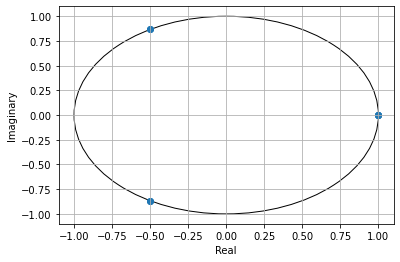

In [9]:
import matplotlib.pyplot as plt

L = 3

print(np.linalg.eigvals(genMatrix(translateOp,make_basis(L))))

x = [z.real for z in np.linalg.eigvals(genMatrix(translateOp,make_basis(L)))]
y = [z.imag for z in np.linalg.eigvals(genMatrix(translateOp,make_basis(L)))]

circle = plt.Circle((0, 0), 1, color='k',fill = False)
fig, ax = plt.subplots()
ax.add_patch(circle)
ax.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.grid()

fig.show()

In [10]:
def translate(state):
    state2 = tuple(list(state[1:])+[state[0]])
    parity = sum(state[1:])
    if state[0]==1 and parity%2!=0:
        return state2, 1 # neglet the sign
    else:
        return state2, 1

In [11]:
import sympy
sympy.Matrix(np.matmul(genMatrix(translateOp,make_basis(L)),createH(L)) - np.matmul(createH(L),genMatrix(translateOp,make_basis(L))))


Matrix([
[0, 0, 0,    0, 0,   0,    0, 0],
[0, 0, 0,    0, 0,   0,    0, 0],
[0, 0, 0,    0, 0,   0,    0, 0],
[0, 0, 0,  2.0, 0,   0,    0, 0],
[0, 0, 0,    0, 0,   0,    0, 0],
[0, 0, 0, -2.0, 0,   0,    0, 0],
[0, 0, 0,    0, 0, 2.0, -2.0, 0],
[0, 0, 0,    0, 0,   0,    0, 0]])

In [12]:
def translate(state):
    state2 = tuple(list(state[1:])+[state[0]])
    parity = sum(state[1:])
    if state[0]==1 and parity%2!=0:
        return state2, -1
    else:
        return state2, 1

## Exercise 11



In [13]:
def make_spin_basis(L):
    basis = []
    for s in itertools.product((0,1), repeat=2*L):
        basis.append(s)
    return basis

In [14]:
L = 4

make_spin_basis(L)

[(0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 0, 0, 1, 0, 1, 1),
 (0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 0, 1, 1, 1, 0),
 (0, 0, 0, 0, 1, 1, 1, 1),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 1),
 (0, 0, 0, 1, 0, 0, 1, 0),
 (0, 0, 0, 1, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1, 0, 1),
 (0, 0, 0, 1, 0, 1, 1, 0),
 (0, 0, 0, 1, 0, 1, 1, 1),
 (0, 0, 0, 1, 1, 0, 0, 0),
 (0, 0, 0, 1, 1, 0, 0, 1),
 (0, 0, 0, 1, 1, 0, 1, 0),
 (0, 0, 0, 1, 1, 0, 1, 1),
 (0, 0, 0, 1, 1, 1, 0, 0),
 (0, 0, 0, 1, 1, 1, 0, 1),
 (0, 0, 0, 1, 1, 1, 1, 0),
 (0, 0, 0, 1, 1, 1, 1, 1),
 (0, 0, 1, 0, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 0, 0, 1),
 (0, 0, 1, 0, 0, 0, 1, 0),
 (0, 0, 1, 0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0, 1, 0, 0),
 

In [15]:
def spin_density(state, site):
    return (state[site] - 0.5)

def cdag(state,site):
    if state[site]==1:
        return None
    else:
        retstate = list(state)
        retstate[site]=1
        retstate=tuple(retstate)
        nSpinfermions = sum(state[:site])
        
        if nSpinfermions%2==0:
            return (retstate, 1)
        else:
            return (retstate, -1)

def c(state,site):
    if state[site]==0:
        return None
    else:
        retstate = list(state)
        retstate[site]=0
        retstate=tuple(retstate)
        nfermions = sum(state[:site])
        
        if nfermions%2==0:
            return (retstate, 1)
        else:
            return (retstate, -1)
        

def create_spin_H(L):
    basis = make_spin_basis(L) #returns basis which state is 2*L long
    dim=len(basis)
    H=np.zeros((dim,dim))
    
    for row,s in enumerate(basis):
        diagmatel = 0.0
        for i in range(L*2):
            diagmatel+= spin_density(s,2*i)*spin_density(s,(2*i+1)%(L*2))
        H[row,row]=diagmatel
        
        for i in range((L*2)):
            ret = c(s,(i+1)%L)
            if ret!=None:
                s2,sign = ret
                
                ret2 = cdag(s2,i)
                if ret2!=None:
                    s3,sign2=ret2
                    
                    col=basis.index(s3)
                    H[row,col]=sign*sign2*hopping
                    H[col,row]=sign*sign2*hopping
    return H
        

In [16]:
import itertools as it
import numpy as np

def genBasis(L): #L number of fermions
    tmp = it.product([0,1], repeat = 2*L) # generate object that itterates over all combinations
    return np.asarray([i for i in tmp]) # assemble the list

In [17]:
L = 3

print(genBasis(L))

[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 1]
 [0 0 1 0 1 0]
 [0 0 1 0 1 1]
 [0 0 1 1 0 0]
 [0 0 1 1 0 1]
 [0 0 1 1 1 0]
 [0 0 1 1 1 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 1]
 [0 1 0 0 1 0]
 [0 1 0 0 1 1]
 [0 1 0 1 0 0]
 [0 1 0 1 0 1]
 [0 1 0 1 1 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 1 0 0 1]
 [0 1 1 0 1 0]
 [0 1 1 0 1 1]
 [0 1 1 1 0 0]
 [0 1 1 1 0 1]
 [0 1 1 1 1 0]
 [0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 1]
 [1 0 0 0 1 0]
 [1 0 0 0 1 1]
 [1 0 0 1 0 0]
 [1 0 0 1 0 1]
 [1 0 0 1 1 0]
 [1 0 0 1 1 1]
 [1 0 1 0 0 0]
 [1 0 1 0 0 1]
 [1 0 1 0 1 0]
 [1 0 1 0 1 1]
 [1 0 1 1 0 0]
 [1 0 1 1 0 1]
 [1 0 1 1 1 0]
 [1 0 1 1 1 1]
 [1 1 0 0 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 1 0]
 [1 1 0 0 1 1]
 [1 1 0 1 0 0]
 [1 1 0 1 0 1]
 [1 1 0 1 1 0]
 [1 1 0 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 1]
 [1 1 1 0 1 0]
 [1 1 1 0 1 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]]


In [18]:
def spin_density(state, site):
    return (state[site] - 0.5)

def c(state, coef, site): #state is copy
    if (state[site] == 0):
        return np.zeros(len(state)), 0
    else:
        state[site] = 0
        if (np.sum(state[:site])%2 == 0):
            return state , 1*coef
        else:
            return state , -1*coef
    
def cdag(state, coef, site):
    if (state[site] == 1):
        return np.zeros(len(state)), 0
    else:
        state[site] = 1
        if (np.sum(state[:site])%2 == 0):
            return state , 1*coef
        else:
            return state , -1*coef

def hubbardHamiltonian(statei,statej, L,t,U): #spin up at even indicies spin down at odd
    hDiag = 0
    if ((np.array_equal(statei,statej))):
        hDiag = U * np.sum([spin_density(statei, 2*i)*spin_density(statei, (2*i +1)%(2*L)) for i in range(L)])
    hOfdiag = 0
    for s in range(L):
        for sigm in [0,1]:
            state1, coef1 = cdag(*c(np.copy(statei),1,2*s + sigm),(2*(s+1) + sigm)%(2*L))
            state2, coef2 = c(*cdag(np.copy(statei),1,2*s + sigm),(2*(s+1) + sigm)%(2*L))
            if np.array_equal(state1, statej):
                hOfdiag += coef1 * (-t)
            if np.array_equal(state2, statej):
                hOfdiag += coef2 * (-t)
    return hDiag + hOfdiag

def calcMatrix(Basis, L, t,U):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i, j in it.product(range(len(Basis)), repeat=2):
        Matrix[i,j] = hubbardHamiltonian(Basis[i], Basis[j], L, t, U)
    return Matrix

def transtionOP(state):
    newState = np.append(state[2:],state[:2], axis = 0)
    parity = sum(state[2:])
    sign1 = (parity%2)*(-1)*state[0]
    sign2 = (parity%2)*(-1)*state[1]
    if (sign1 == sign2):
        sign = 1
    else:
        sign = -1
    return newState, sign

def translateOp(statei, statej, params = None):
    if np.array_equal(statei,transtionOP(statej)[0]):
        return transtionOP(statej)[1]
    else:
        return 0

def genMatrix(operator, basis):
    Matrix = np.empty((len(basis), len(basis)))
    for i, j in it.product(range(len(basis)), repeat=2):
        Matrix[i,j] = operator(basis[i],basis[j])
    return Matrix


def genFamily(state, operator, L): # generate the family of a state with an operator
    """generate the family of a state with an operator"""
    family = np.asarray([[state, 0, 1]], dtype = object)
    for r in range(1,L): #not 2*L
        family = np.append(family, [[operator(family[-1][0])[0],r,operator(family[-1][0])[1] * family[-1][2]]], axis=0)
    return family

def getRepresentativ(state, operator, L): # the representativ is the first entry in the sortet family
    tmpa =genFamily(state,operator, L)[:,0]
    tmp = []
    for i in tmpa:
        tmp.append(i)
    tmp = np.asanyarray(tmp,dtype = object)
    for i in range(len(tmp[0])): # over the length of the states
       tmp = tmp[tmp[:,i].argsort()]
    return tmp[0]

def get_shift_sign_ofstate(state,operator,L):
    rep = getRepresentativ(state,operator,L)
    s = rep
    sign=1
    shift=0
    for x in range(L):
        # print("equ", s, state)
        if np.array_equal(s, state):
            return shift, sign
        else:
            s,sgn = operator(s)
            sign*=sgn
            shift+=1
    if np.array_equal(s, state):
        return shift, sign


def get_norm(state, nk,operator, L ):
    k=2.*np.pi*nk/L
    fam = genFamily(state,operator,L)
    
    fam = tuple(fam)

    different_states = set()
    for s,r,sign in fam:
        different_states.add(tuple(s))
    
    prefactors = {s:0.0 for s in different_states}
    
    for s, r, sign in fam:
        prefactors[tuple(s)] += sign*np.exp(1.j*k*r)
    
    norm = 0.0
    for s in prefactors:
        norm += np.abs( prefactors[s] )**2
        
    return np.sqrt(norm)

def calcHam(L,operator):
    hamils = []
    dimsum = 0
    for nk in range(L):
        k=2.*np.pi*nk/L
    
        basis = genBasis(L)

        sector_reps={}
        for s in basis:
            rep = getRepresentativ(s,operator,L)
            #fam = create_family(rep)
            norm=get_norm(rep,nk, operator, L)
            if norm>1e-6: 
                if tuple(rep) not in sector_reps:
                    sector_reps[tuple(rep)]=norm
        secdim = len(sector_reps.keys())
        print(nk, secdim)
        dimsum+=secdim
        
        sector_basis=list(sector_reps.keys())
        
        
        # here, we have the sector reps and norms
        Hk = np.zeros((secdim, secdim), dtype=np.complex128)
        
        for row, rep in enumerate(sector_basis):
            matel=0.0
            
            Hk[row,row] = np.sum([spin_density(rep, 2*i)*spin_density(rep, (2*i +1)%(2*L)) for i in range(L)])
            
            #for i in range(L):
            #    matel+= # density(rep,i)*density(rep,(i+1)%L)
            # Hk[row,row]=matel
            
            for sigma in [0,1]:
                for l in range(L):
                    lp1=((l+1)*2 + sigma)%(L*2)
                    
                    for l1,l2 in [(2*l + sigma,lp1), (lp1, 2*l + sigma)]:
                        if rep[l1]==1 and rep[l2]==0:
                            s1, sgn1 = c(np.asarray(rep),1,l1)
                            s2, sgn2 = cdag(s1,1,l2)

                            

                            rep2 = getRepresentativ(s2,operator,L)
                            
                            if (rep2 == sector_basis).all(1).any():
                                print(rep2, sector_basis)
                                col = np.where(np.all(rep2==sector_basis,axis=1)) #col = np.where(rep2 in sector_basis) # sector_basis.index(rep2)
                                print(col)
                                # sprint(col)
                                repshift, repsign = get_shift_sign_ofstate(s2,operator,L)
                                
                                norm1 = sector_reps[tuple(rep)]
                                norm2 = sector_reps[tuple(rep2)]
                                                    
                                    
                                matel = norm2/norm1 * hopping * sgn1 * sgn2 * repsign * np.exp(1.j*k*repshift)
                                
                                Hk[row,col] += matel
        hamils.append(Hk)
    return hamils
    
    
    
    kspec = np.linalg.eigvalsh(Hk)
    # specs.extend(kspec)

In [19]:
testindex = 6

a = genBasis(L)
print(c(np.copy(a[testindex]), 1,1))
print(a[testindex], len(a))

print(transtionOP(a[testindex]))

(array([0., 0., 0., 0., 0., 0.]), 0)
[0 0 0 1 1 0] 64
(array([0, 1, 1, 0, 0, 0]), 1)


In [20]:
#genFamily(a[testindex],transtionOP,L)

print(genFamily(a[testindex],transtionOP,L), "RESULT")
print(getRepresentativ(a[testindex],transtionOP,L))
print(get_shift_sign_ofstate(a[testindex +13],transtionOP,L))

[[array([0, 0, 0, 1, 1, 0]) 0 1]
 [array([0, 1, 1, 0, 0, 0]) 1 1]
 [array([1, 0, 0, 0, 0, 1]) 2 -1]] RESULT
[0 1 1 0 0 0]
(1, 1)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [21]:
print(get_norm(a[testindex],3,transtionOP,L))

1.7320508075688772


In [22]:
print(hubbardHamiltonian(a[testindex],a[testindex],L,1,1))

print(hubbardHamiltonian(a[testindex],a[testindex + 4],L,1,1))

-0.25
0


In [23]:
import sympy
#sympy.Matrix(calcMatrix(genBasis(L),L,1,1))
#sympy.Matrix(genMatrix(translateOp,genBasis(L)))

In [24]:
print(np.matmul(genMatrix(translateOp,genBasis(L)),calcMatrix(genBasis(L),L,1,1)) - np.matmul(calcMatrix(genBasis(L),L,1,1),genMatrix(translateOp,genBasis(L))))
print(np.matmul(np.transpose(genMatrix(translateOp,genBasis(L))),genMatrix(translateOp,genBasis(L))))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [25]:
dimsum = 0
for nk in range(L):
    sector_reps={}
    for s in genBasis(L):
        rep = getRepresentativ(s,transtionOP,L)
        #fam = genFamily(rep)
        norm=get_norm(rep,nk,transtionOP,L)
        if norm>1e-6: 
            if tuple(rep) not in sector_reps:
                sector_reps[tuple(rep)]=norm
    secdim = len(sector_reps.keys())
    print(nk, secdim)
    dimsum+=secdim
print("total ", dimsum, " should be ", 4**L)

0 24
1 20
2 20
total  64  should be  64


In [27]:
print(L)
sympy.Matrix(calcHam(L,transtionOP)[1])

3
0 24
[0 1 0 0 0 0] [(0, 0, 0, 0, 0, 0), (0, 1, 0, 0, 0, 0), (1, 0, 0, 0, 0, 0), (1, 1, 0, 0, 0, 0), (0, 1, 0, 1, 0, 0), (0, 1, 1, 0, 0, 0), (0, 1, 1, 1, 0, 0), (1, 0, 0, 1, 0, 0), (1, 0, 1, 0, 0, 0), (1, 0, 1, 1, 0, 0), (1, 1, 0, 1, 0, 0), (1, 1, 1, 0, 0, 0), (1, 1, 1, 1, 0, 0), (0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0), (1, 1, 0, 1, 0, 1), (0, 1, 1, 0, 1, 0), (1, 1, 0, 1, 1, 0), (0, 1, 1, 1, 1, 0), (1, 1, 1, 1, 0, 1), (1, 0, 1, 0, 1, 0), (1, 1, 1, 0, 1, 0), (1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1)]
(array([1]),)
[0 1 0 0 0 0] [(0, 0, 0, 0, 0, 0), (0, 1, 0, 0, 0, 0), (1, 0, 0, 0, 0, 0), (1, 1, 0, 0, 0, 0), (0, 1, 0, 1, 0, 0), (0, 1, 1, 0, 0, 0), (0, 1, 1, 1, 0, 0), (1, 0, 0, 1, 0, 0), (1, 0, 1, 0, 0, 0), (1, 0, 1, 1, 0, 0), (1, 1, 0, 1, 0, 0), (1, 1, 1, 0, 0, 0), (1, 1, 1, 1, 0, 0), (0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0), (1, 1, 0, 1, 0, 1), (0, 1, 1, 0, 1, 0), (1, 1, 0, 1, 1, 0), (0, 1, 1, 1, 1, 0), (1, 1, 1, 1, 0, 1), (1, 0, 1, 0, 1, 0), (1, 1, 1, 0, 1, 0), (1, 1, 1, 1, 1, 0), (1, 1, 1,

Matrix([
[-0.75 + 3.33066907387547e-16*I,                              0,                          0,                             0,                            0,                          0,                            0,                             0,                                          0,                          0,                          0,                          0,                          0,                              0,                                         0,                          0,                          0,                             0,                              0,                             0],
[                             0, -0.75 + 3.33066907387547e-16*I,                          0,                             0,                            0,                          0,                            0,                             0,                                          0,                          0,                          0,                        